# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

As an analyst we have been given a task to study a dataframe basically consist of a hundreds of ads in Crankshaft List website. Basically the main goal of this study is **to find what are the factor(s) that influence the price of a vehicle**

## Initialization

We start with load the necessary library

In [1]:
import pandas as pd

In [2]:
import matplotlib as plt

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

### Load data

Then, we load the dataframe.

In [5]:
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Based on the dataframe we could detect a null values for `model_year` , `cylinders` , `odometer` , `paint_color` and `is_4wd`

Take a look also on the `date_posted` column it indicate as object. We need to be aware on this, and we might need to change this to searchable date & year format.     

In [8]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

We can see below `is_4wd` has the most missing value by 50% and follow by `paint_color` > `odometer` > `cylinders` > `model_year`

In [9]:
nul_val = df.isna().sum()
total_rows = 51525
nul_val/total_rows

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [10]:
nul_val

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusions and further steps

In this initial findings, we can say there are four columns has a missing values which is `is_4wd`  `paint_color` > `odometer` > `cylinders` > `model_year` . Next, we shall check for duplicate value(if any) and try to replace null values based on identified columns.

## Treat missing values (if any)

Based on our initial study `is_4wd` has the most missing value follow by `paint_color` > `odometer` > `cylinders` > `model_year` . Therefore, we will treat all this column where necessary.

In [12]:
is_4wd_per = df.is_4wd.isna().sum()/total_rows
print(f'Null values % is: {is_4wd_per:0.0000%}')

Null values % is: 50%


Since this value has nearly to 50% of missing value we cannot ignore this column. We proceed to check their data type

In [13]:
df['is_4wd'].unique()

array([ 1., nan])

Looks like a Boolean field. We'll replace missing values with 0.

In [14]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [15]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Next, we study the `paint_color` column

In [16]:
paint_color_per = df.paint_color.isna().sum()/total_rows
print(f'Null values % is: {paint_color_per:0.0000%}')

Null values % is: 18%


Since this value has 18% of missing value we cannot ignore this column. What we can do is to replace this value to `n/a`. 

In [17]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [18]:
df['paint_color'] = df['paint_color'].fillna('na')

In [19]:
df['paint_color'].value_counts()

white     10029
na         9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

The `odometer`, `cylinders`, `model_year`, and `price` columns will now be discussed. Since they contain numerical information, we must investigate their relationship to the categorical variables in the dataset.

It would be logical to assume that the price and mileage relate to the car's condition, and the model's year and cylinder count to its model. The medians will be used to fill in any missing values as we group the data based on these factors.

In [20]:
grouped_by_condition = df.groupby('condition').agg({'odometer': 'median', 'price': 'median'})
for cond in df['condition'].unique():
    df.loc[(df['condition'] == cond) & (df['odometer'].isna()), 'odometer'] = \
        grouped_by_condition.loc[grouped_by_condition.index == cond, 'odometer'][0]
    df.loc[(df['condition'] == cond) & (df['price'].isna()), 'price'] = \
        grouped_by_condition.loc[grouped_by_condition.index == cond, 'price'][0]

In [21]:
grouped_by_model = df.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
for model in df['model'].unique():
    df.loc[(df['model'] == model) & (df['model_year'].isna()), 'model_year'] = \
        grouped_by_model.loc[grouped_by_model.index == model, 'model_year'][0]
    df.loc[(df['model'] == model) & (df['cylinders'].isna()), 'cylinders'] = \
        grouped_by_model.loc[grouped_by_model.index == model, 'cylinders'][0]


Let's check the results of our work to fill in missing values:

In [22]:
sum_nul_val = df.isna().sum().to_frame()
sum_nul_val = sum_nul_val.rename(columns = {0: 'missing_values'})
sum_nul_val['% of total'] = (sum_nul_val['missing_values'] / df.shape[0]).round(2)
sum_nul_val.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
price,0,0.0
model_year,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0
type,0,0.0
paint_color,0,0.0


## Fix data types

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Let's convert the following columnar data types:
- the `date_posted` to the datetime;
- Converting `days_listed`, `id`, `model_year`, and `cylinders` to `int` because they almost certainly contain integer variables;
- Since it's a Boolean field, convert `is_4wd` to boolean.
- `price` and `mileage` to float as they may contain fractions
- Text columns for `Model`, `Condition`, `Fuel Type`, `Transmission Type`, and `Paint_Color`;
- The type we need is already present in `id`.


In [24]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [25]:
int_colums = ['days_listed', 'model_year', 'cylinders']
for col in int_colums: df[col] = df[col].astype(int)

In [26]:
df['is_4wd'] = df['is_4wd'].astype(bool)

In [27]:
display(df.head(3))
df.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,na,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Enrich data

We enrich the data as follows:
- The weekday, month, and year the ad was placed;
- When the ad was placed, how old the car was (in years);
- The average number of miles a car gets in a year;

Change the string values in the condition column to a number scale:

- new = 5;
- like new = 4;
- excellent = 3;
- good = 2;
- fair = 1;
- salvage = 0.


In [28]:
df['weekday_posted'] = df['date_posted'].dt.weekday.astype(int)
df['month_posted'] = df['date_posted'].dt.month.astype(int)
df['year_posted'] = df['date_posted'].dt.year.astype(int)

In [29]:
df['lifetime'] = (df['year_posted'] - df['model_year']).astype(int) + 1

In [30]:
df['avg_mileage'] = df['odometer'] / df['lifetime'] 

Double check the info

In [31]:
display(df.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,lifetime,avg_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,na,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,na,False,2019-03-22,9,4,3,2019,17,10683.117647
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


Then we introduce numeric scale for describing vehicle condition:

In [32]:
def get_condition(cell):
    if cell == 'new': return 5
    if cell == 'like new': return 4
    if cell == 'excellent': return 3
    if cell == 'good': return 2
    if cell == 'fair': return 1
    return 0

In [33]:
df['condition'] = df['condition'].apply(get_condition).astype(int)

## Check clean data

Now we can see the overview of a cleansed dataframe.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  weekday_posted  51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  ye

In [35]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,lifetime,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,na,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,na,False,2019-03-22,9,4,3,2019,17,10683.117647
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


## Study core parameters


We will plot graph as parameters below:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

/tmp/ipykernel_184/1619674454.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


,count,mean,std,min,25%,50%,75%,max
price,51525.0,12132.46492,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0


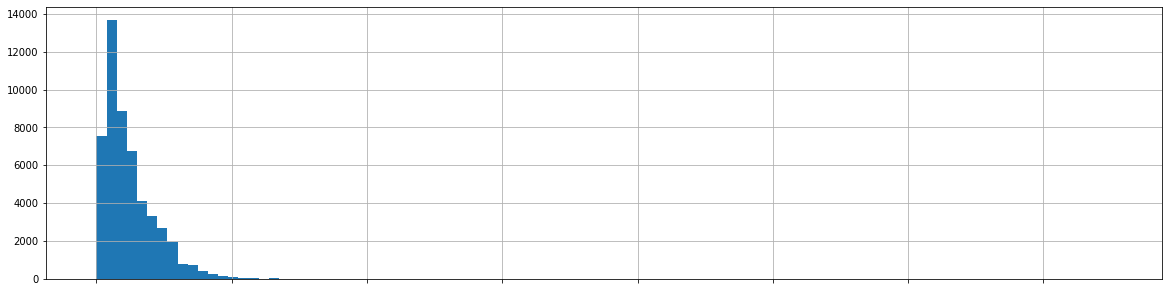

In [36]:
fig, ax = plt.subplots(figsize=(20, 5))
column = 'price'
df[column].hist(bins=100, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
display(df[[column]].describe().T)

To avoid multiple code we will introduce loop to the function

,count,mean,std,min,25%,50%,75%,max
lifetime,51525.0,9.513906,6.112976,1.0,5.0,9.0,13.0,111.0
odometer,51525.0,115199.014508,60484.863376,0.0,75668.0,110908.0,147821.0,990000.0
cylinders,51525.0,6.121067,1.657457,3.0,4.0,6.0,8.0,12.0
condition,51525.0,2.637535,0.712447,0.0,2.0,3.0,3.0,5.0


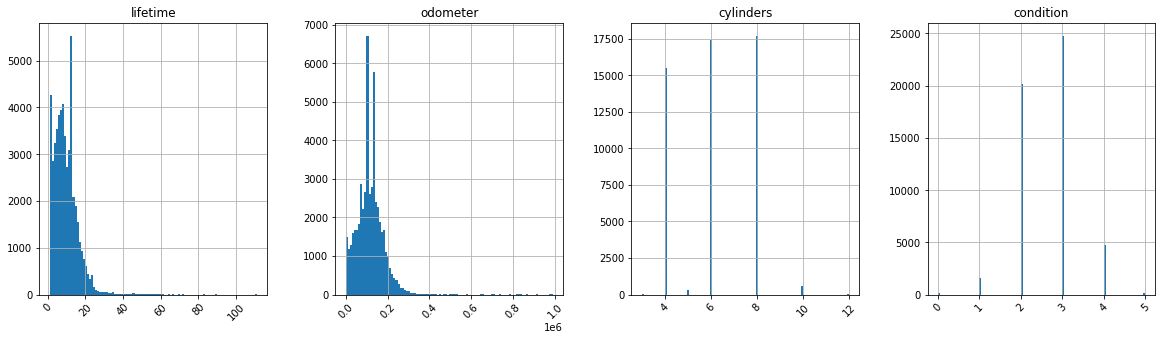

In [37]:
plt.subplots(figsize = (20, 5))
columns = ['lifetime','odometer','cylinders','condition']
for i, column in enumerate(columns):
    df.hist(column, bins = 100, ax = plt.subplot(1, len(columns), i + 1))
    plt.xticks(rotation = 45)
display(df[columns].describe().T)

## Study and treat outliers

The histograms are not readable, so we need to get rid of outliers. 
The way we process this is to use Turkey's method. This method will remove all the unnessary data within our dataframe.

We'll make a new DataFrame with the filtered data.

In [38]:
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday_posted,month_posted,year_posted,lifetime,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.014508,39.55476,3.005434,6.628491,2018.307462,9.513906,15378.482765
std,10040.803015,6.099381,0.712447,1.657457,60484.863376,28.20427,1.997759,3.474134,0.461447,6.112976,11808.757090
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,9363.636364
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,3.000000,7.000000,2018.000000,9.000000,13036.181818
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,5.000000,10.000000,2019.000000,13.000000,18222.222222
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,111.000000,373200.000000


In [39]:
# Determine the lower limits and Upper Limit for outliers
# Thus, straight store in the new dataframe
# Select the columns to filter
columns = ['price', 'lifetime', 'odometer', 'cylinders', 'condition']

# Define the Tukey's method function to detect outliers
def Tukey_method(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers = column[(column < lower_threshold) | (column > upper_threshold)]
    return outliers

# Apply Tukey's method to remove outliers from the selected columns
for col in columns:
    outliers = Tukey_method(df[col])
    df = df[~df[col].isin(outliers)]

# Save the filtered DataFrame to a new variable
df_filtered = df.copy()

In [40]:
# check the new filtred dataframe
df_filtered.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday_posted,month_posted,year_posted,lifetime,avg_mileage
count,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000,48026.000000
mean,11254.736143,2010.090763,2.637884,6.055595,113594.050192,39.543768,3.001124,6.632866,2018.306667,9.215904,15176.043077
std,7822.971032,5.023156,0.681020,1.656785,52779.343769,28.224190,1.996457,3.473276,0.461115,5.036827,10785.998529
min,1.000000,1994.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,78843.500000,19.000000,1.000000,3.000000,2018.000000,5.000000,9475.454545
50%,8995.000000,2011.000000,3.000000,6.000000,111848.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,13028.750000
75%,15991.000000,2014.000000,3.000000,8.000000,146000.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,17988.000000
max,34595.000000,2019.000000,4.000000,12.000000,253258.000000,271.000000,6.000000,12.000000,2019.000000,25.000000,195700.000000


Lets see the overall picture by plot a Histogram

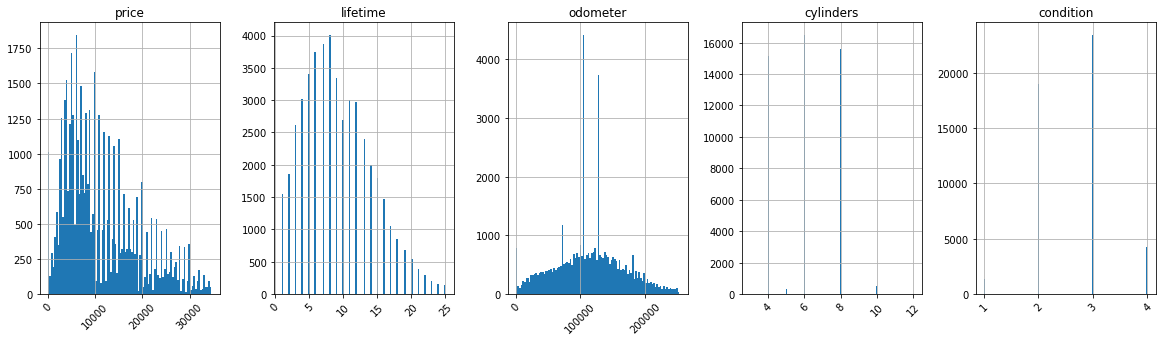

In [41]:
plt.subplots(figsize = (20, 5))
columns = ['price', 'lifetime','odometer','cylinders','condition']
for i, column in enumerate(columns):
    df.hist(column, bins = 100, ax = plt.subplot(1, len(columns), i + 1))
    plt.xticks(rotation = 45)

Much better Picture:
- Price: in the majority of ads the price ranges between `$5,000` and `$16,000`. The histogram has a number of discrete peaks that represent particular models.
- Cylinders: most of the vehicles acquired `8` cylinders
- Mileage: we can see the mileage as normal distribution. Vehicles with lower mileage sell better. Sudden surges are probably the result of our filling in missing values.
- Age: vehicles 6-8 years old sell the most.
- Condition: almost all the cars seems to be in very good condition or even better.

## Study core parameters without outliers

,count,mean,std,min,25%,50%,75%,max
price,48026.0,11254.736143,7822.971032,1.0,5000.0,8995.0,15991.0,34595.0
lifetime,48026.0,9.215904,5.036827,1.0,5.0,8.0,12.0,25.0
odometer,48026.0,113594.050192,52779.343769,0.0,78843.5,111848.0,146000.0,253258.0
cylinders,48026.0,6.055595,1.656785,3.0,4.0,6.0,8.0,12.0
condition,48026.0,2.637884,0.681020,1.0,2.0,3.0,3.0,4.0


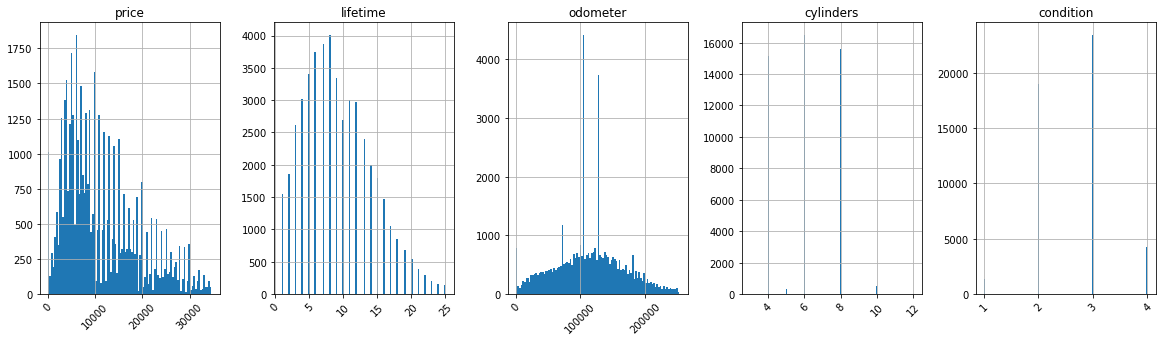

In [42]:
plt.subplots(figsize = (20, 5))
columns = ['price','lifetime','odometer','cylinders','condition']
for i, column in enumerate(columns):
    df_filtered.hist(column, bins = 100, ax = plt.subplot(1, len(columns), i + 1))
    plt.xticks(rotation = 45)
display(df_filtered[columns].describe().T)

Much better Picture:
- Price: in the majority of ads the price ranges between `$5,000` and `$16,000`. The histogram has a number of discrete peaks that represent particular models.
- Cylinders: most of the vehicles acquired `8` cylinders
- Mileage: we can see the mileage as normal distribution. Vehicles with lower mileage sell better. Sudden surges are probably the result of our filling in missing values.
- Age: vehicles 6-8 years old sell the most.
- Condition: almost all the cars seems to be in very good condition or even better.

## Ads lifetime

Here we try to see the overview of how many days a car need to be taken to be sold from the ads.

count    48026.000000
mean        39.543768
std         28.224190
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

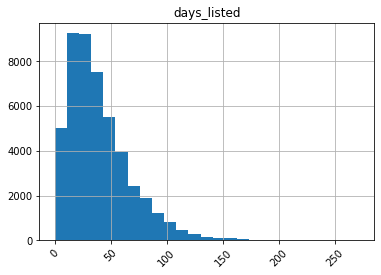

In [43]:
display(df_filtered['days_listed'].describe())
df_filtered.hist('days_listed', bins = 25)
plt.xticks(rotation = 45)
plt.show()

The median for ads lifetime of an ad is 33 days for a car. We can see also theres an ads were removed by abnormally sold within 19 days, which is abnormally quick. Then, If theres ads been listed for 53 days, which is abnormally long.

## Average price per each type of vehicle

,ads,avg_price
type,,
sedan,11903,6985.128455
SUV,11837,10476.840331
truck,11033,15169.631379
pickup,6241,15098.068098
coupe,2017,13484.701041
wagon,1489,9016.474144
mini-van,1138,8057.882250
hatchback,998,6851.443888
van,576,8894.652778


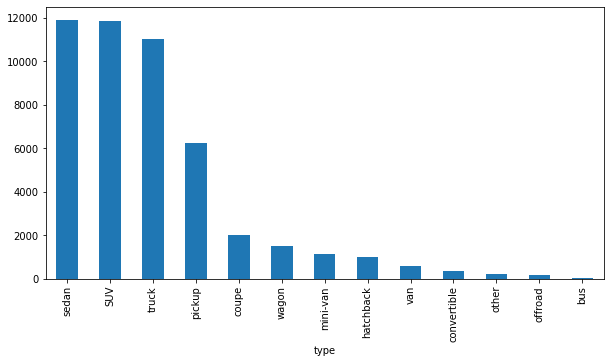

In [44]:
vehicle_price_report = (df_filtered.groupby(['type']).agg({'model': 'count', 'price': 'mean'})
                       .rename(columns = {'model': 'ads', 'price': 'avg_price'})
                       .sort_values(by = 'ads', ascending = False))
vehicle_price_report.head(30)['ads'].plot(kind = 'bar', figsize = (10, 5))
vehicle_price_report

## Price factors

We got top two model listed. SUV and sedan.

- What factors impact the price most? we can assume from the age, mileage, condition, transmission type, and color. 

Start with SUV

In [45]:
df_filtered_type = df_filtered[df_filtered['type'] == 'SUV']

columns = ['lifetime', 'odometer', 'condition', 'transmission', 'paint_color', 'price']
display(df_filtered_type[columns].corr()[['price']].sort_values(by = 'price', ascending = False))

,price
price,1.000000
condition,0.257229
odometer,-0.483291
lifetime,-0.572287


In [46]:
for i, col in enumerate(columns):
    if col == 'price': continue
    if np.issubdtype(df_filtered_type[col].dtype, np.number):
        df_grouped = df_filtered_type.groupby(col).agg({'price': 'median'})
    else:
        df_grouped = df_filtered_type.groupby(col).agg({'model': 'count', 'price': 'median'}) \
                                              .rename(columns = {'model': 'ads', 'price': 'median_price'}) \
                                              .sort_values(by = 'median_price', ascending = False) \
                                              .query('ads > 50')
    display(df_grouped)

,price
lifetime,
1,17900.0
2,18325.0
3,16995.0
4,16990.0
5,14800.0
6,12900.0
7,10900.0
8,9950.0
9,8900.0


,price
odometer,
0.0,5888.0
1.0,1.0
2.0,3600.0
10.0,475.0
14.0,326.0
...,...
251904.0,4995.0
253000.0,2500.0
253108.0,2500.0


,price
condition,
1,2300
2,6995
3,9975
4,12995


,ads,median_price
transmission,,
manual,459,10995
automatic,11220,8700
other,158,5765


,ads,median_price
paint_color,,
orange,81,16900
black,2085,10990
white,1859,9900
na,2132,8797
grey,1144,8500
silver,1525,8400
custom,295,7995
red,867,7800
brown,351,7400


- For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (11).

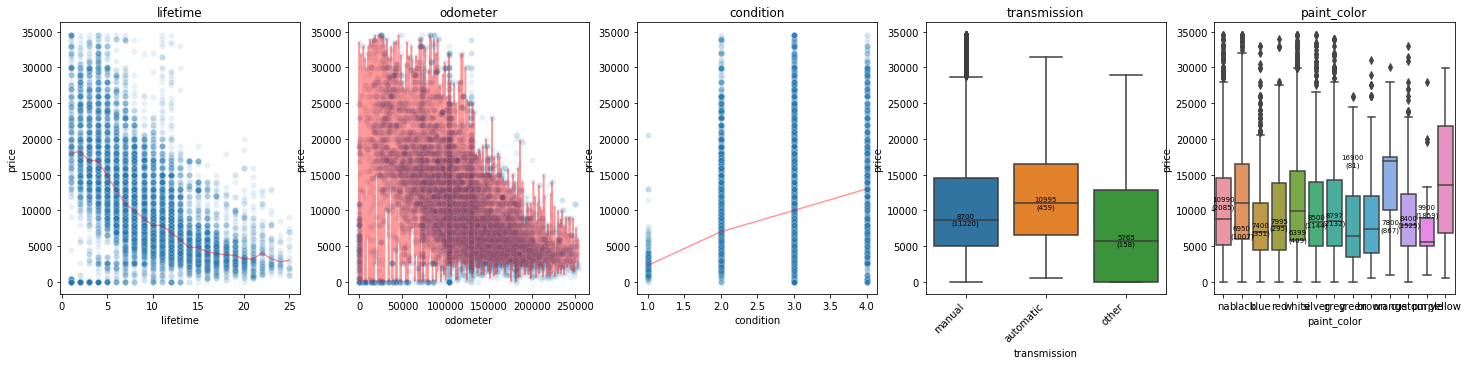

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter data for SUVs
df_filtered_type = df_filtered[df_filtered['type'] == 'SUV']

# columns to plot
columns = ['lifetime', 'odometer', 'condition', 'transmission', 'paint_color']

# create subplots
fig, axs = plt.subplots(1, len(columns), figsize=(25, 5))

# plot each column
for i, col in enumerate(columns):
    # scatter plot for numerical columns
    if np.issubdtype(df_filtered_type[col].dtype, np.number):
        sns.scatterplot(x=col, y='price', data=df_filtered_type, alpha=0.1, ax=axs[i])
        sns.lineplot(x=col, y='price', data=df_filtered_type.groupby(col)['price'].median().reset_index(),
                     color='red', alpha=0.4, ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
    # boxplot for categorical columns
    else:
        sns.boxplot(x=col, y='price', data=df_filtered_type, ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        # display median price and number of ads for each category
        category_stats = df_filtered_type.groupby(col).agg({'model': 'count', 'price': 'median'}) \
                                            .rename(columns={'model': 'ads', 'price': 'median_price'}) \
                                            .reset_index() \
                                            .query('ads > 50') \
                                            .sort_values(by='median_price', ascending=False)
        for idx, row in category_stats.iterrows():
            axs[i].text(idx, row['median_price'], f"{row['median_price']:.0f}\n({row['ads']:.0f})", 
                        ha='center', va='center', fontdict={'size': 7})
        axs[i].set_xticklabels(category_stats[col], rotation=45, ha='right')

plt.subplots_adjust(top=0.85, bottom=0.15, wspace=0.3)
plt.suptitle('Price vs Features for SUVs', fontsize=16)
plt.show()



Overview analysis for SUV:

- We observe a negative correlation between the age of a vehicle and its price: the older the vehicle, the cheaper it is.
- We observe a negative correlation between the mileage and price.
- We can a gradual increase as the condition of the car getting better.
- Vehicles with manual transmissions cost considerably less than those with automatic transmissions.
- Orange, black, and white vehicles are the most expensive. Green ones are the cheapest. Yellow cars also seem moderate, but they are not widely represented in the ads.

Let's carry out a similar analysis for sedan:

In [48]:
df_filtered_sedan = df_filtered[df_filtered['type'] == 'sedan']

columns = ['lifetime', 'odometer', 'condition', 'transmission', 'paint_color', 'price']
for i, col in enumerate(columns):
    if col == 'price': continue
    if np.issubdtype(df_filtered_sedan[col].dtype, np.number):
        df_grouped_sedan = df_filtered_sedan.groupby(col).agg({'price': 'median'})
    else:
        df_grouped_sedan = df_filtered_sedan.groupby(col).agg({'model': 'count', 'price': 'median'}) \
                                              .rename(columns = {'model': 'ads', 'price': 'median_price'}) \
                                              .sort_values(by = 'median_price', ascending = False) \
                                              .query('ads > 50')
    display(df_grouped_sedan)

,price
lifetime,
1,14669
2,12950
3,10995
4,9995
5,8750
6,7700
7,6950
8,6000
9,5500


,price
odometer,
0.0,6900.0
1.0,4500.0
6.0,23431.0
10.0,384.0
15.0,1995.0
...,...
252000.0,1800.0
252148.0,700.0
252186.0,3500.0


,price
condition,
1,1550
2,4995
3,6950
4,7995


,ads,median_price
transmission,,
automatic,11202,6000
manual,570,4500
other,131,3800


,ads,median_price
paint_color,,
black,1747,6950.0
white,1473,6700.0
grey,1599,6350.0
na,2139,5995.0
red,926,5995.0
silver,2014,5992.5
blue,1212,5725.0
custom,291,5495.0
brown,253,4498.0


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (10).

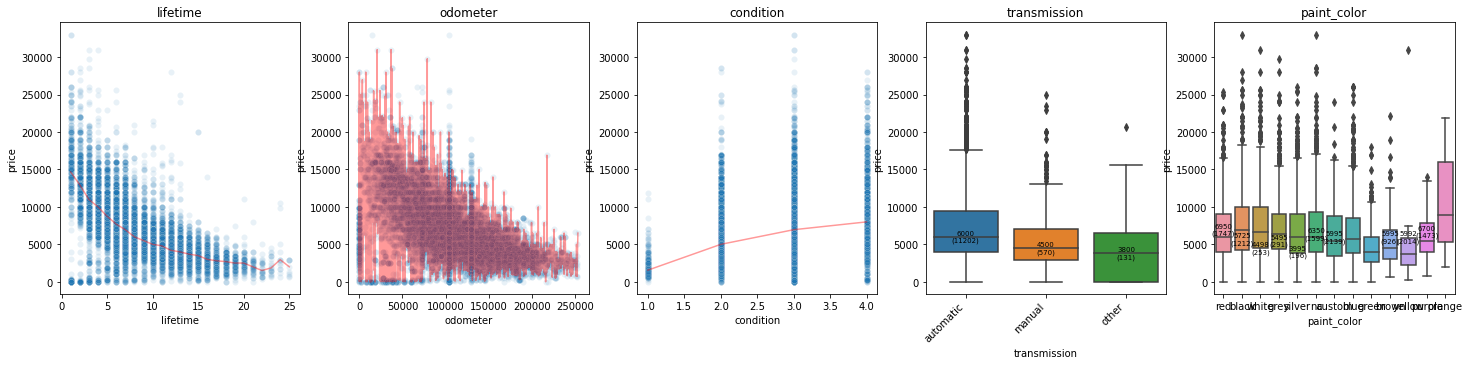

In [49]:
# filter data for sedan
df_filtered_sedan = df_filtered[df_filtered['type'] == 'sedan']

# columns to plot
columns = ['lifetime', 'odometer', 'condition', 'transmission', 'paint_color']

# create subplots
fig, axs = plt.subplots(1, len(columns), figsize=(25, 5))

# plot each column
for i, col in enumerate(columns):
    # scatter plot for numerical columns
    if np.issubdtype(df_filtered_sedan[col].dtype, np.number):
        sns.scatterplot(x=col, y='price', data=df_filtered_sedan, alpha=0.1, ax=axs[i])
        sns.lineplot(x=col, y='price', data=df_filtered_sedan.groupby(col)['price'].median().reset_index(),
                     color='red', alpha=0.4, ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
    # boxplot for categorical columns
    else:
        sns.boxplot(x=col, y='price', data=df_filtered_sedan, ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        # display median price and number of ads for each category
        category_stats = df_filtered_sedan.groupby(col).agg({'model': 'count', 'price': 'median'}) \
                                            .rename(columns={'model': 'ads', 'price': 'median_price'}) \
                                            .reset_index() \
                                            .query('ads > 50') \
                                            .sort_values(by='median_price', ascending=False)
        for idx, row in category_stats.iterrows():
            axs[i].text(idx, row['median_price'], f"{row['median_price']:.0f}\n({row['ads']:.0f})", 
                        ha='center', va='center', fontdict={'size': 7})
        axs[i].set_xticklabels(category_stats[col], rotation=45, ha='right')

plt.subplots_adjust(top=0.85, bottom=0.15, wspace=0.3)
plt.suptitle('Price vs Features for SUVs', fontsize=16)
plt.show()


Overview analysis for sedan:

- We observe a negative correlation between the age of a vehicle and its price: the older the vehicle, the cheaper it is.
- We observe a negative correlation between the mileage and price.
- We can a gradual increase as the condition of the vehicle getting better.
- Vehicles with manual transmissions cost considerably less than those with automatic transmissions.
- black, yellow, and grey vehicles are the most expensive. Green ones are the cheapest. 

## General conclusion

Here we write an overview for Top 2 vehicle findings

Overview analysis for both vehicle:

- We observe same negative correlation for both vehicle. The age of a vehicle and its price: the older the vehicle, the cheaper it is.
- We observe a negative correlation between the mileage and price for both vehicle.
- We can a gradual increase as the condition of the vehicle getting better for both vehicle.
- Vehicles with manual transmissions cost considerably less than those with automatic transmissions. Apply to both vehicles
- black, yellow, and grey for sedan vehicles are the most expensive. Whereas, for SUVs Orange, black, and white vehicles are the most expensive. Both Sedan and SUVs has the cheapest price for Green.